In [64]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import pathlib

import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


100
Found 101 files belonging to 11 classes.
Using 81 files for training.
(8, 180, 180, 3)
(8,)


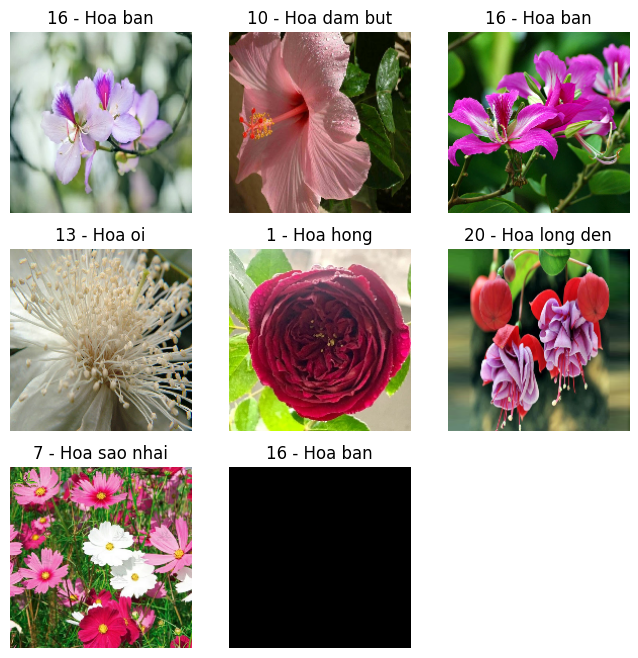

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_33 (Rescaling)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,059 (15.22 MB)

 Trainable params: 3,990,059 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

Found 101 files belonging to 11 classes.
Using 20 files for validation.
Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.0831 - loss: 2.9660 - val_accuracy: 0.0000e+00 - val_loss: 2.4062
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.2470 - loss: 2.3282 - val_accuracy: 0.0000e+00 - val_loss: 2.6970
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - accuracy: 0.1867 - loss: 2.1751 - val_accuracy: 0.1000 - val_loss: 2.3123
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - accuracy: 0.5529 - loss: 1.7889 - val_accuracy: 0.2500 - val_loss: 2.1968
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 0.7104 - loss: 1.0151 - val_accuracy: 0.0500 - val_loss: 3.5183
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8106 - loss: 0.7662 - val_accuracy: 0.2500 - val_loss: 3.2343
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.9744 - loss: 0.2366 - val_accuracy: 0.1500 - val_loss: 4.5327
Epoch 8/20
11/11 ━━━━━━━

In [65]:
data_dir = pathlib.Path(r"D:\chuyen de cong nghe\Set_X")
data_dir
image_count = len(list(data_dir.glob('Train/*/*.jpg')))
print(image_count)
list(data_dir.glob('Train/*/*.jpg'))
flowers = list(data_dir.glob('Train/*/*'))
PIL.Image.open(str(flowers[10]))
str(flowers[0])
batch_size = 8
img_height = 180
img_width = 180
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir.joinpath("Train") ,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
class_names
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
plt.imshow(image_batch[0].numpy().astype("uint8"))
plt.show()
image_batch.shape, labels_batch.shape
## model

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir.joinpath("Train"),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

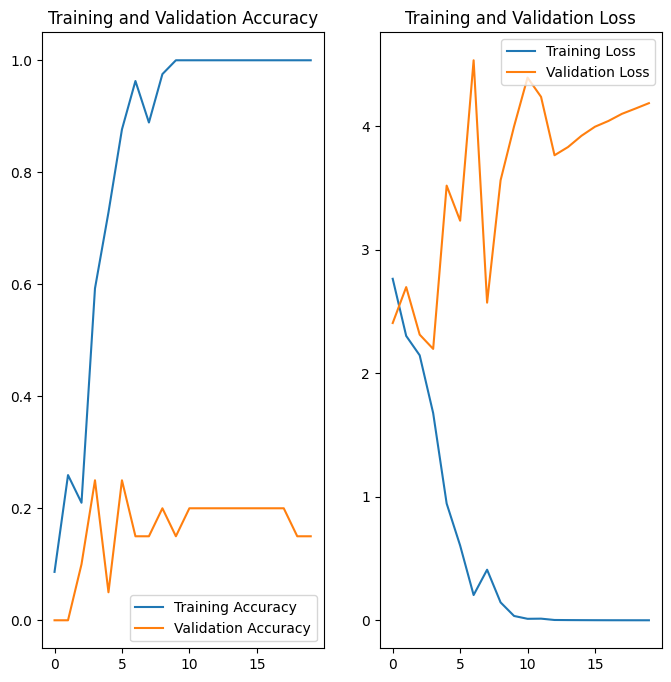

In [66]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

D:\chuyen de cong nghe\Set_X\Test\0_HoaSen.jpg
D:\chuyen de cong nghe\Set_X\Test\15_Lan hac vy 012.jpg 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This image most likely belongs to 15 - Lan hac vy with a 47.97 percent confidence.
15 - Lan hac vy 47.973862290382385 D:\chuyen de cong nghe\Set_X\Test\0_HoaSen.jpg
Image Path: 0_HoaSen.jpg
Predicted Class: 15 - Lan hac vy with a 47.97% confidence.
--------------------------------------------------


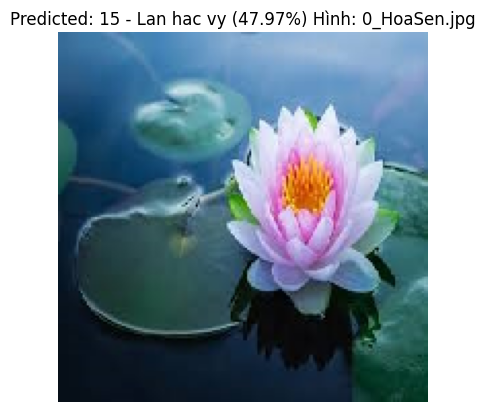

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This image most likely belongs to 10 - Hoa dam but with a 93.89 percent confidence.
10 - Hoa dam but 93.8944399356842 D:\chuyen de cong nghe\Set_X\Test\10_Hoa dam but.jpg
Image Path: 10_Hoa dam but.jpg
Predicted Class: 10 - Hoa dam but with a 93.89% confidence.
--------------------------------------------------


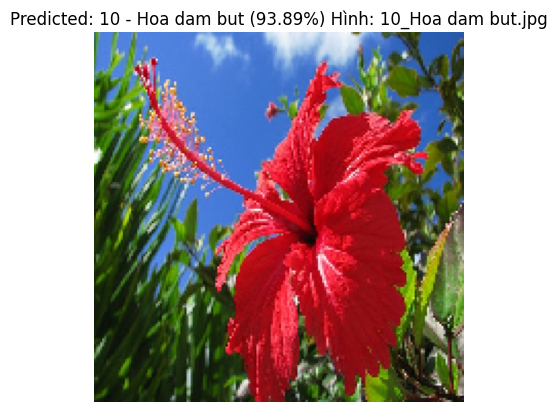

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This image most likely belongs to 1 - Hoa hong with a 54.08 percent confidence.
1 - Hoa hong 54.075413942337036 D:\chuyen de cong nghe\Set_X\Test\11_Hoa huong duong 002.jpg
Image Path: 11_Hoa huong duong 002.jpg
Predicted Class: 1 - Hoa hong with a 54.08% confidence.
--------------------------------------------------


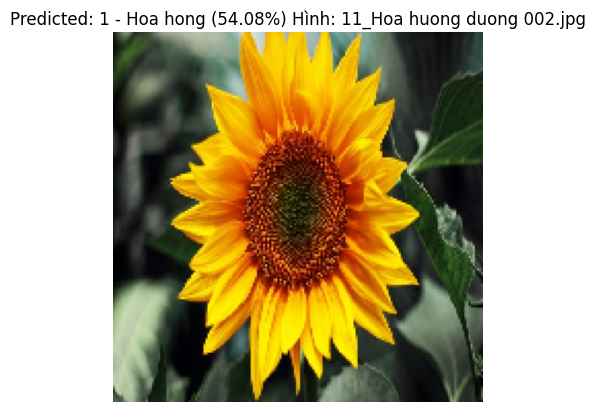

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
This image most likely belongs to 10 - Hoa dam but with a 95.66 percent confidence.
10 - Hoa dam but 95.66258192062378 D:\chuyen de cong nghe\Set_X\Test\12_Hong tu cau 005.jpg
Image Path: 12_Hong tu cau 005.jpg
Predicted Class: 10 - Hoa dam but with a 95.66% confidence.
--------------------------------------------------


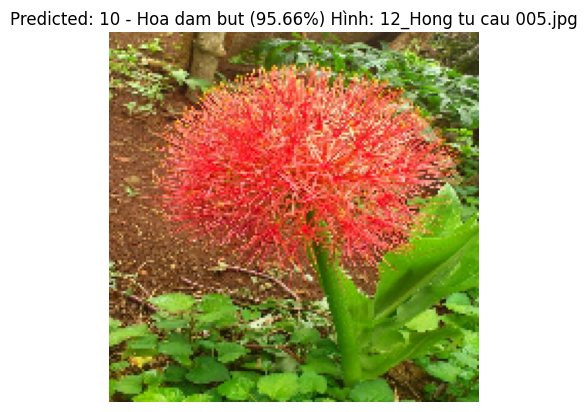

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
This image most likely belongs to 13 - Hoa oi with a 50.30 percent confidence.
13 - Hoa oi 50.30256509780884 D:\chuyen de cong nghe\Set_X\Test\13_Hoa oi 015.jpg
Image Path: 13_Hoa oi 015.jpg
Predicted Class: 13 - Hoa oi with a 50.30% confidence.
--------------------------------------------------


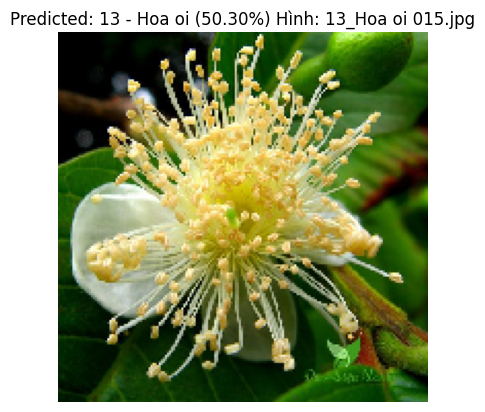

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
This image most likely belongs to 1 - Hoa hong with a 51.35 percent confidence.
1 - Hoa hong 51.34615898132324 D:\chuyen de cong nghe\Set_X\Test\14_Hoa Tram Oi 004.jpg
Image Path: 14_Hoa Tram Oi 004.jpg
Predicted Class: 1 - Hoa hong with a 51.35% confidence.
--------------------------------------------------


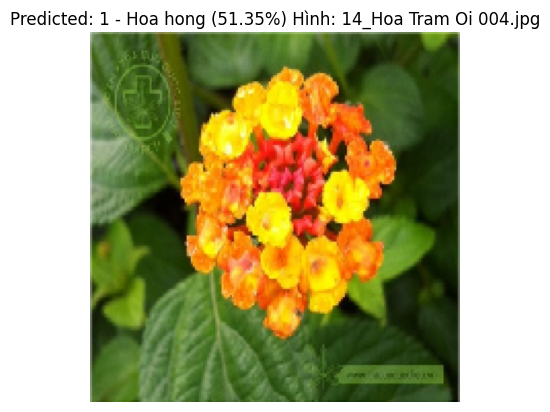

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
This image most likely belongs to 15 - Lan hac vy with a 51.79 percent confidence.
15 - Lan hac vy 51.78610682487488 D:\chuyen de cong nghe\Set_X\Test\15_Lan hac vy 012.jpg
Image Path: 15_Lan hac vy 012.jpg
Predicted Class: 15 - Lan hac vy with a 51.79% confidence.
--------------------------------------------------


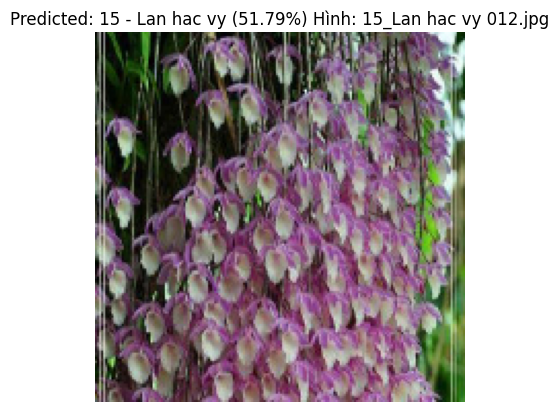

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
This image most likely belongs to 16 - Hoa ban with a 69.14 percent confidence.
16 - Hoa ban 69.13891434669495 D:\chuyen de cong nghe\Set_X\Test\16_Hoa ban 011.jpg
Image Path: 16_Hoa ban 011.jpg
Predicted Class: 16 - Hoa ban with a 69.14% confidence.
--------------------------------------------------


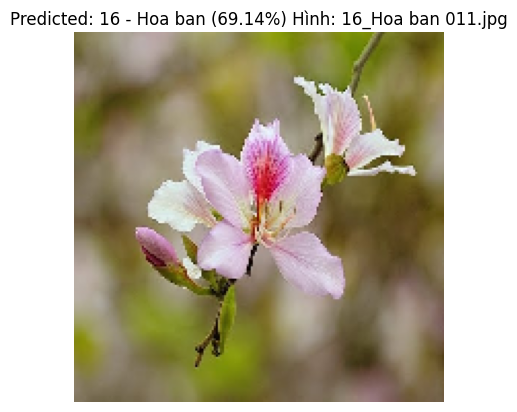

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This image most likely belongs to 1 - Hoa hong with a 63.20 percent confidence.
1 - Hoa hong 63.20459246635437 D:\chuyen de cong nghe\Set_X\Test\17_Hoa atiso 011.jpg
Image Path: 17_Hoa atiso 011.jpg
Predicted Class: 1 - Hoa hong with a 63.20% confidence.
--------------------------------------------------


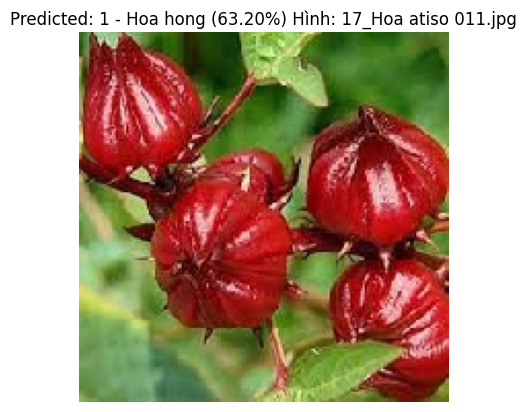

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This image most likely belongs to 19 - Hoa Phao Bong with a 99.86 percent confidence.
19 - Hoa Phao Bong 99.86464381217957 D:\chuyen de cong nghe\Set_X\Test\18_Tung tuyet mai 004.jpg
Image Path: 18_Tung tuyet mai 004.jpg
Predicted Class: 19 - Hoa Phao Bong with a 99.86% confidence.
--------------------------------------------------


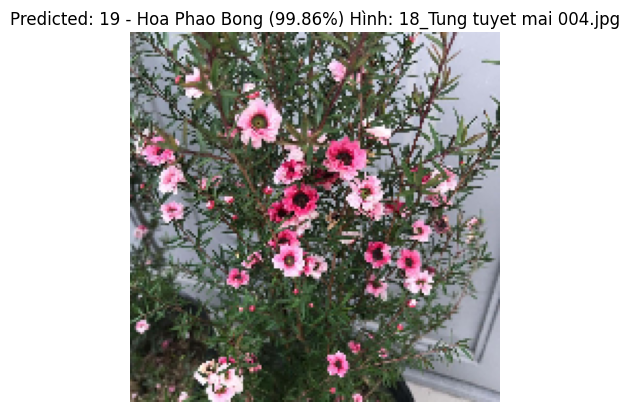

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
This image most likely belongs to 19 - Hoa Phao Bong with a 98.33 percent confidence.
19 - Hoa Phao Bong 98.33101630210876 D:\chuyen de cong nghe\Set_X\Test\19_Hoa Thien Phuc 009.jpg
Image Path: 19_Hoa Thien Phuc 009.jpg
Predicted Class: 19 - Hoa Phao Bong with a 98.33% confidence.
--------------------------------------------------


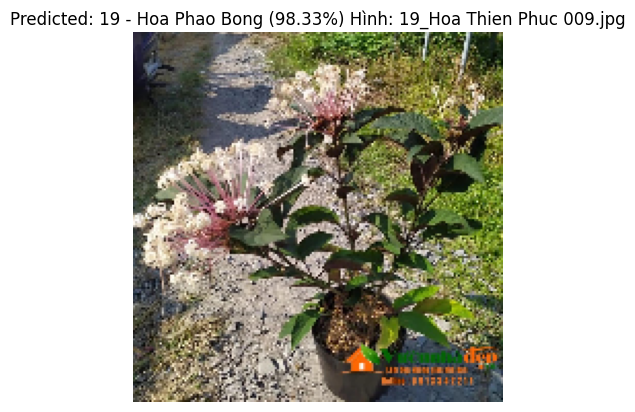

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
This image most likely belongs to 1 - Hoa hong with a 93.49 percent confidence.
1 - Hoa hong 93.49265694618225 D:\chuyen de cong nghe\Set_X\Test\1_HoaHong.jpg
Image Path: 1_HoaHong.jpg
Predicted Class: 1 - Hoa hong with a 93.49% confidence.
--------------------------------------------------


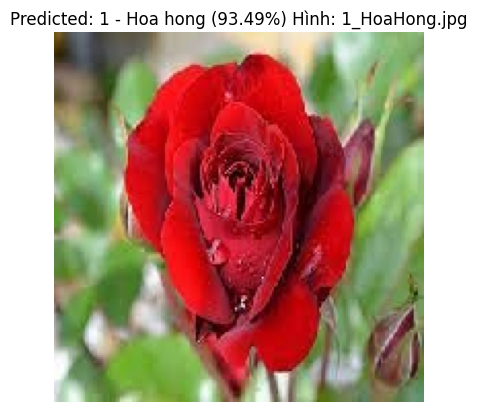

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This image most likely belongs to 1 - Hoa hong with a 51.23 percent confidence.
1 - Hoa hong 51.229411363601685 D:\chuyen de cong nghe\Set_X\Test\20_Hoa long den 014.jpg
Image Path: 20_Hoa long den 014.jpg
Predicted Class: 1 - Hoa hong with a 51.23% confidence.
--------------------------------------------------


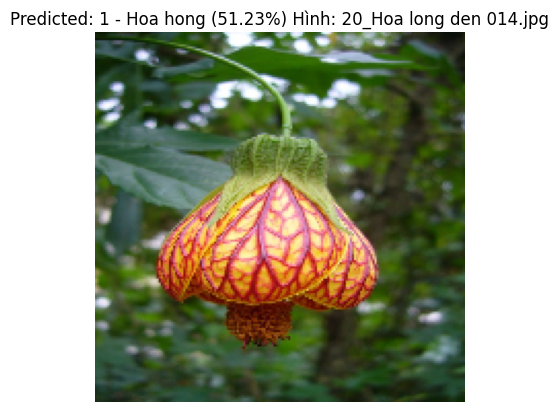

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
This image most likely belongs to 13 - Hoa oi with a 97.42 percent confidence.
13 - Hoa oi 97.42350578308105 D:\chuyen de cong nghe\Set_X\Test\2_HoaNhai.jpg
Image Path: 2_HoaNhai.jpg
Predicted Class: 13 - Hoa oi with a 97.42% confidence.
--------------------------------------------------


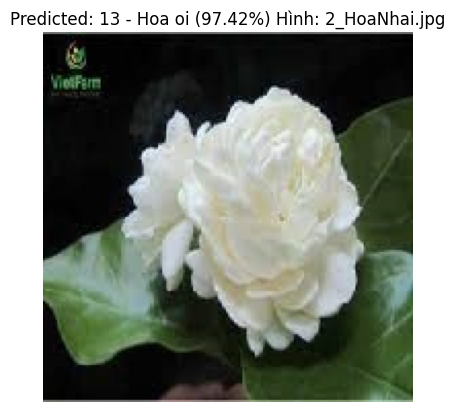

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
This image most likely belongs to 19 - Hoa Phao Bong with a 69.50 percent confidence.
19 - Hoa Phao Bong 69.49958205223083 D:\chuyen de cong nghe\Set_X\Test\3_HoaMai.jpg
Image Path: 3_HoaMai.jpg
Predicted Class: 19 - Hoa Phao Bong with a 69.50% confidence.
--------------------------------------------------


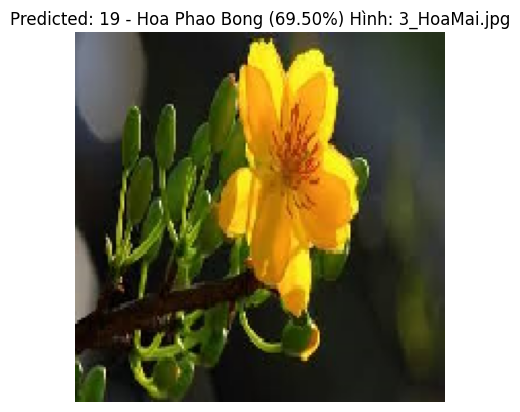

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This image most likely belongs to 5 - Hoa man with a 27.18 percent confidence.
5 - Hoa man 27.179229259490967 D:\chuyen de cong nghe\Set_X\Test\4_HoaAnhDao.jpg
Image Path: 4_HoaAnhDao.jpg
Predicted Class: 5 - Hoa man with a 27.18% confidence.
--------------------------------------------------


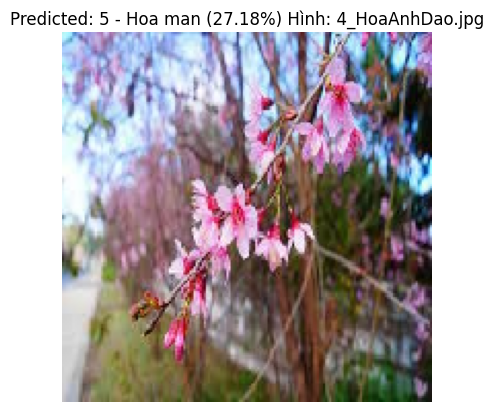

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
This image most likely belongs to 5 - Hoa man with a 99.99 percent confidence.
5 - Hoa man 99.99125003814697 D:\chuyen de cong nghe\Set_X\Test\5_HoaMan.jpg
Image Path: 5_HoaMan.jpg
Predicted Class: 5 - Hoa man with a 99.99% confidence.
--------------------------------------------------


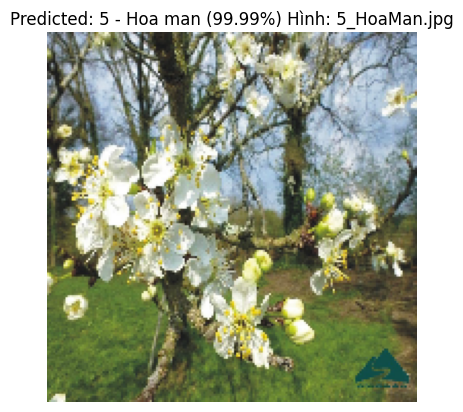

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
This image most likely belongs to 15 - Lan hac vy with a 47.78 percent confidence.
15 - Lan hac vy 47.77595400810242 D:\chuyen de cong nghe\Set_X\Test\6_HoaDoQuyen.jpg
Image Path: 6_HoaDoQuyen.jpg
Predicted Class: 15 - Lan hac vy with a 47.78% confidence.
--------------------------------------------------


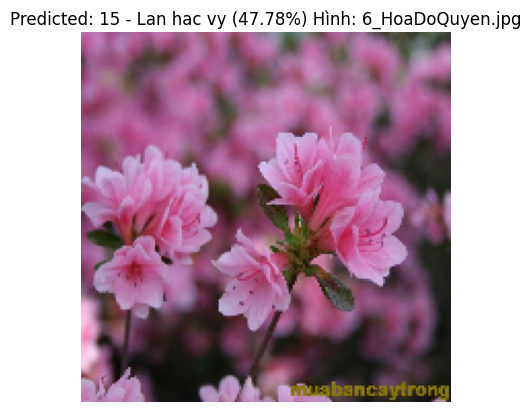

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
This image most likely belongs to 3 - Hoa mai with a 43.26 percent confidence.
3 - Hoa mai 43.26271712779999 D:\chuyen de cong nghe\Set_X\Test\8_HoaThuocDuoc.jpg
Image Path: 8_HoaThuocDuoc.jpg
Predicted Class: 3 - Hoa mai with a 43.26% confidence.
--------------------------------------------------


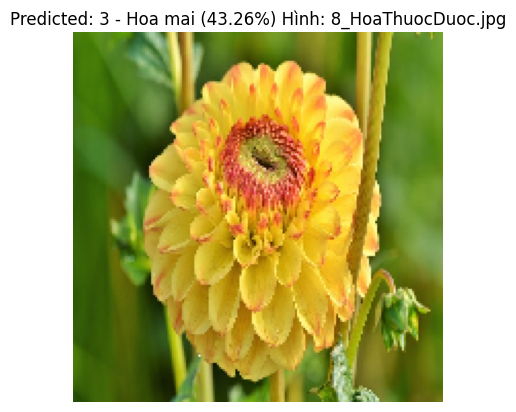

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
This image most likely belongs to 13 - Hoa oi with a 88.46 percent confidence.
13 - Hoa oi 88.46396803855896 D:\chuyen de cong nghe\Set_X\Test\9_HoaSung.jpg
Image Path: 9_HoaSung.jpg
Predicted Class: 13 - Hoa oi with a 88.46% confidence.
--------------------------------------------------


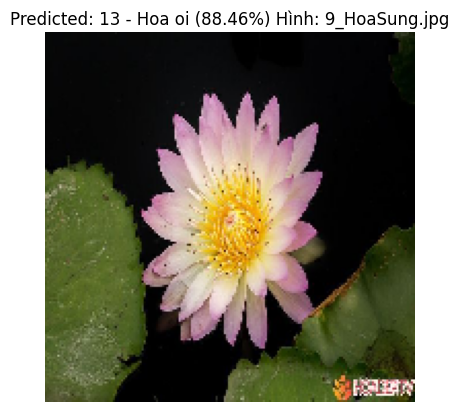

Kết quả đã được lưu vào file predictions.csv.


In [74]:
testlist = list(data_dir.glob('Test/*.jpg'))
print(testlist[0])

import pandas as pd  # Import pandas để làm việc với file CSV

# Tạo danh sách để lưu kết quả
results = []

i = 6
sunflower_path = testlist[i]
print(testlist[i], "\n")
for sunflower_path in testlist:
    img = tf.keras.utils.load_img(
        sunflower_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Tạo batch
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(predicted_class, confidence)
    )
    print(predicted_class, confidence, sunflower_path)

    # In kết quả ra console
    print(f"Image Path: {sunflower_path.name}")
    print(f"Predicted Class: {predicted_class} with a {confidence:.2f}% confidence.")
    print("-" * 50)

    # Hiển thị ảnh và kết quả dự đoán
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%) Hình: {sunflower_path.name}")
    plt.axis('off')  # Ẩn trục
    plt.show()

    
    # Thêm kết quả vào danh sách
    results.append({
        "Image Path": sunflower_path,
        "Predicted Class": predicted_class,
        "Confidence (%)": confidence
    })

# Ghi kết quả vào file CSV
df = pd.DataFrame(results)
df.to_csv("predictions1.csv", index=False)
print("Kết quả đã được lưu vào file predictions.csv.")


In [7]:
import tensorflow as tf
import io  # Import thư viện io

# Huấn luyện và xây dựng mô hình của bạn ở đây

# Lưu mô hình đã huấn luyện với định dạng Keras mới
model.save('my_model.keras')  # Lưu vào file .keras

# Xuất model.summary() ra file với mã hóa utf-8
with open('model_summary.txt', 'w', encoding='utf-8') as f:
    string_io = io.StringIO()
    model.summary(print_fn=lambda x: string_io.write(x + '\n'))
    f.write(string_io.getvalue())